## Evaluate Mean-Squared End-to-End Distances for Internal Polymer Segments

### Import Modules

In [1]:
import os
import sys

cwd = os.getcwd()
parent_dir = cwd + "/../.."
sys.path.insert(1, parent_dir)

import numpy as np
import matplotlib.pyplot as plt

import analyses.characterizations.eval_mean_r2 as r2
from analyses.characterizations.inspect_simulations import get_snapshot_paths

### Specify Simulation

In [2]:
output_dir = '/scratch/users/jwakim/chromo_two_mark_phase_transition/output'
polymer_prefix = "Chr"
sim_prefix = "sim_"
sim_ind = 1
sim_dir = f"{output_dir}/{sim_prefix}{sim_ind}"
num_equilibration = 180
lp = 53
save_file = "avg_squared_e2e.txt"
bead_spacing = 16.5
lower_log = -1.0
upper_log = 2.0
log_step = 0.05
kuhn_length = 2 * lp
save_path = f"{sim_dir}/{save_file}"

### Load Simulation Outputs

In [3]:
output_paths = get_snapshot_paths(
    output_dir, sim_ind, num_equilibration
)

### Get Segment Lengths Evenly Spaced on Log Scale

In [4]:
bead_range = r2.get_interval_widths(lower_log, upper_log, log_step)

### Get Mean End-to-End Distance for Internal Segments of each Length

In [5]:
avg_r2 = r2.get_mean_r2(output_paths, bead_range, lp)

Snapshot: 10 of 20

Snapshot: 20 of 20



### Save the Mean Squared End-to-End Distances

In [6]:
seg_length_kuhn = r2.get_interval_widths_kuhn(bead_range, bead_spacing, lp)    
r2_theory = r2.get_avg_r2_theory(seg_length_kuhn)

In [7]:
r2.save_mean_r2(save_path, seg_length_kuhn, avg_r2, r2_theory)

### Run All Above Analyses in One Function

In [11]:
%%capture
"""
r2.main(
    output_dir,
    sim_ind,
    num_equilibration,
    save_path,
    lp,
    bead_spacing
)
"""

### Plot the Mean Squared End-to-End Distances

Notice the deviation from the theory at large length scales. This is because we are simulating a semiflexible polymer with monomer attraction.

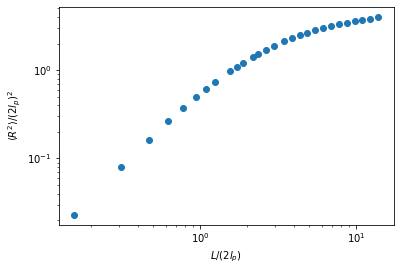

In [9]:
plt.figure()
plt.scatter(seg_length_kuhn, avg_r2)
plt.xlabel(r"$L/(2l_p)$")
plt.ylabel(r"$\langle R^2 \rangle /(2l_p)^2$")
plt.yscale("log")
plt.xscale("log")
plt.show()

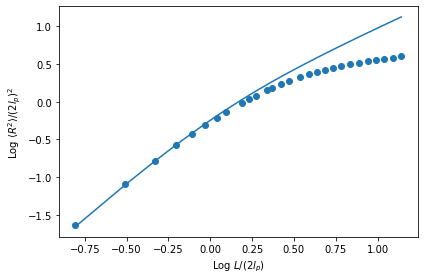

In [10]:
plt.figure()
plt.scatter(np.log10(seg_length_kuhn), np.log10(avg_r2))
plt.xlabel(r"Log $L/(2l_p)$")
plt.ylabel(r"Log $\langle R^2 \rangle /(2l_p)^2$")
plt.plot(np.log10(seg_length_kuhn), np.log10(r2_theory))
plt.tight_layout()
plt.show()